# Task D: Come closer, darling!, Eccentric orbits

In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized #, acceleration_direct, acceleration_pyfalcon, acceleration_jerk_direct
from fireworks.particles import Particles
from typing import Optional, Tuple, Callable, Union
import time

#from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

We have to choose the initial conditions of our system, namely the two masses, the distance $r$ and the eccentricity $e$. We will consider the three cases $e=0.5$, $e=0.9$ and $e=0.99$ separately. 

In [38]:
t0 = time.time()

mass1 = 1.
mass2 = 2.
rp = 5. 
e_1 = 0.5               
e_2 = 0.9
e_3 = 0.99

part_1 = ic_two_body(mass1, mass2, rp, e_1)
part_2 = ic_two_body(mass1, mass2, rp, e_2)
part_3 = ic_two_body(mass1, mass2, rp, e_3)

### Estimate the period

To estimate the period we use:
$$
P = \sqrt{\frac{4\pi^2a^3}{GM}}
$$
Since we're working in Nbody-units we can get rid of the constant $G$. The semi-major axis $a$ comes from $r_p = a(1-e)$. $M$ is the total mass of the system. We will use this procedure for all three values of $e$.

In [39]:
M_tot_1 = np.sum(part_1.mass)
M_tot_2 = np.sum(part_2.mass)
M_tot_3 = np.sum(part_3.mass)

# e = 0.5 
a_1 = rp / (1 - e_1)
P_1 = np.sqrt((4 * np.pi**2. * a_1**3.)/(M_tot_1))
print('P_1 = ', P_1)

# e = 0.9
a_2 = rp / (1 - e_2)
P_2 = np.sqrt((4 * np.pi**2. * a_2**3.)/(M_tot_2))
print('P_2 = ', P_2)

# e = 0.99 
a_3 = rp / (1 - e_3)
P_3 = np.sqrt((4 * np.pi**2. * a_3**3.)/(M_tot_3))
print('P_3 = ', P_3)

P_1 =  114.71474419090953
P_2 =  1282.5498301618645
P_3 =  40557.78675973606


So, with the initial conditions we gave as imput, we get:

$ P_1 = 114.71$ 

$ P_2 = 1282.55$ 

$ P_3 = 40557.79$ 

### Evolution of the binary system

We have now to evolve the binary systems from $0$ to $10\cdot P$. To do so we use the three different integrators we implemented: the Euler, the Leapfrog and the Runge-Kutta, along with our function `acceleration_direct_vectorized` to estimate the acceleration, exactly as done before.

In [40]:
def integration_euler(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_euler = []
    Ekin_euler = []
    Epot_euler = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_euler(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_euler.append(Etot_n)
            Ekin_euler.append(Ekin_n)
            Epot_euler.append(Epot_n)

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_euler = np.array(Etot_euler)
    Ekin_euler = np.array(Ekin_euler)
    Etot_euler = np.array(Epot_euler)

    return path_1, path_2, Etot_euler, Ekin_euler, Epot_euler

In [41]:
def integration_leapfrog(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_leapfrog = []
    Ekin_leapfrog = []
    Epot_leapfrog = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_leapfrog(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_leapfrog.append(Etot_n)
            Ekin_leapfrog.append(Ekin_n)
            Epot_leapfrog.append(Epot_n)
        

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_leapfrog = np.array(Etot_leapfrog)
    Ekin_leapfrog = np.array(Ekin_leapfrog)
    Epot_leapfrog = np.array(Epot_leapfrog)

    return path_1, path_2, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog

In [42]:
def integration_rungekutta(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_rungekutta = []
    Ekin_rungekutta = []
    Epot_rungekutta = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_rungekutta(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_rungekutta.append(Etot_n)
            Ekin_rungekutta.append(Ekin_n)
            Epot_rungekutta.append(Epot_n)
        

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_rungekutta = np.array(Etot_rungekutta)
    Ekin_rungekutta = np.array(Ekin_rungekutta)
    Epot_rungekutta = np.array(Epot_rungekutta)

    return path_1, path_2, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta

In [43]:
def total_energy_error(Etot, t, tsimulation, h):
    energy_error = np.zeros(len(Etot)-1)

    for i in range(len(energy_error)):
        energy_error[i] = np.abs((Etot[i] - Etot[0])/Etot[0])

    time = np.arange(0, tsimulation, h)

    return energy_error, time

Initialize the variables. We want to have a number of timesteps equal for each method. Let's take $n_{steps} = 100000$. 

In [44]:
nsteps = 100000            #arbitrary number of timesteps

tsimulation_1 = 10*P_1      # end of the simulation for e = 0.5
tsimulation_2 = 10*P_2      # end of the simulation for e = 0.9
tsimulation_3 = 10*P_3      # end of the simulation for e = 0.99

t = 0

h_1 = (tsimulation_1-t)/nsteps
h_2 = (tsimulation_2-t)/nsteps
h_3 = (tsimulation_3-t)/nsteps

'''

h_1 = 1
h_2 = 10
h_3 = 100

'''

t = 0

N = 2                       # number of particles


print(h_1, h_2, h_3)                  


0.011471474419090954 0.12825498301618646 4.055778675973606


### EULER METHOD

In [45]:
part_1_euler = part_1.copy()
part_2_euler = part_2.copy()
part_3_euler = part_3.copy()

# e = 0.5
path1_euler_1, path2_euler_1, Etot_euler_1, Ekin_euler_1, Epot_euler_1 = integration_euler(part_1_euler, h_1, tsimulation_1, t, N)

# e = 0.9
path1_euler_2, path2_euler_2, Etot_euler_2, Ekin_euler_2, Epot_euler_2 = integration_euler(part_2_euler, h_2, tsimulation_2, t, N)

# e = 0.99
path1_euler_3, path2_euler_3, Etot_euler_3, Ekin_euler_3, Epot_euler_3 = integration_euler(part_3_euler, h_3, tsimulation_3, t, N)

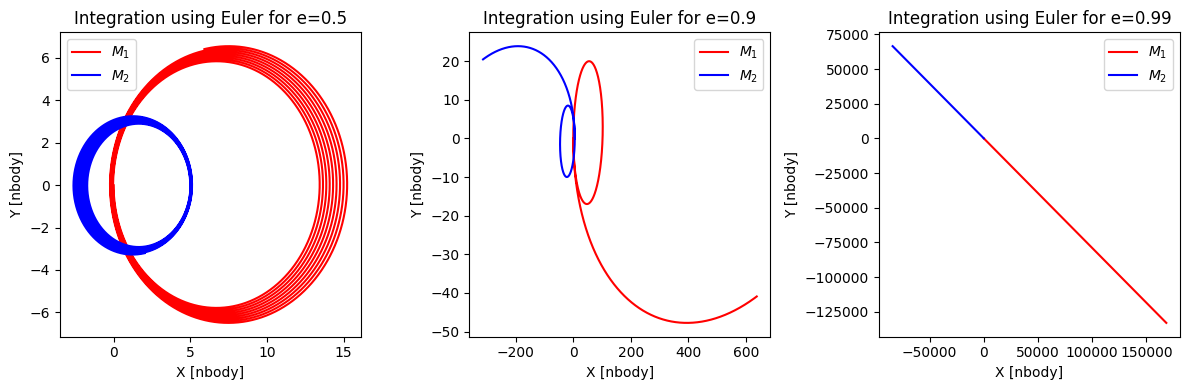

In [46]:
plt.figure(figsize=(12,4))

plt.suptitle('Integration using Euler with different eccentricities')

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('e=0.5')
plt.plot(path1_euler_1[:,0], path1_euler_1[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_1[:,0], path2_euler_1[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('e=0.9')
plt.plot(path1_euler_2[:,0], path1_euler_2[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_2[:,0], path2_euler_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('e=0.99')
plt.plot(path1_euler_3[:,0], path1_euler_3[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_3[:,0], path2_euler_3[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()
plt.show()

### LEAPFROG METHOD

In [47]:
part_1_leapfrog = part_1.copy()
part_2_leapfrog = part_2.copy()
part_3_leapfrog = part_3.copy()

# e = 0.5
path1_leapfrog_1, path2_leapfrog_1, Etot_leapfrog_1, Ekin_leapfrog_1, Epot_leapfrog_1 = integration_leapfrog(part_1_leapfrog, h_1, tsimulation_1, t, N)

# e = 0.9
path1_leapfrog_2, path2_leapfrog_2, Etot_leapfrog_2, Ekin_leapfrog_2, Epot_leapfrog_2 = integration_leapfrog(part_2_leapfrog, h_2, tsimulation_2, t, N)

# e = 0.99
path1_leapfrog_3, path2_leapfrog_3, Etot_leapfrog_3, Ekin_leapfrog_3, Epot_leapfrog_3 = integration_leapfrog(part_3_leapfrog, h_3, tsimulation_3, t, N)

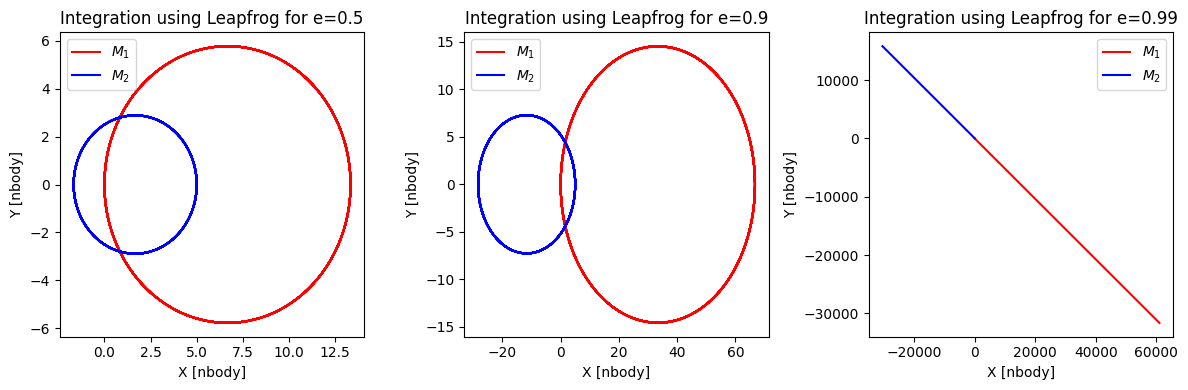

In [48]:
plt.figure(figsize=(12,4))

plt.suptitle('Integration using Leapfrog with different eccentricities')

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('e=0.5')
plt.plot(path1_leapfrog_1[:,0], path1_leapfrog_1[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_1[:,0], path2_leapfrog_1[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('e=0.9')
plt.plot(path1_leapfrog_2[:,0], path1_leapfrog_2[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_2[:,0], path2_leapfrog_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('e=0.99')
plt.plot(path1_leapfrog_3[:,0], path1_leapfrog_3[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_3[:,0], path2_leapfrog_3[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()
plt.show()

### RUNGE- KUTTA METHOD

In [49]:
part_1_rungekutta = part_1.copy()
part_2_rungekutta = part_2.copy()
part_3_rungekutta = part_3.copy()

# e = 0.5
path1_rungekutta_1, path2_rungekutta_1, Etot_rungekutta_1, Ekin_rungekutta_1, Epot_rungekutta_1 = integration_rungekutta(part_1_rungekutta, h_1, tsimulation_1, t, N)

# e = 0.9
path1_rungekutta_2, path2_rungekutta_2, Etot_rungekutta_2, Ekin_rungekutta_2, Epot_rungekutta_2 = integration_rungekutta(part_2_rungekutta, h_2, tsimulation_2, t, N)

# e = 0.99
path1_rungekutta_3, path2_rungekutta_3, Etot_rungekutta_3, Ekin_rungekutta_3, Epot_rungekutta_3 = integration_rungekutta(part_3_rungekutta, h_3, tsimulation_3, t, N)

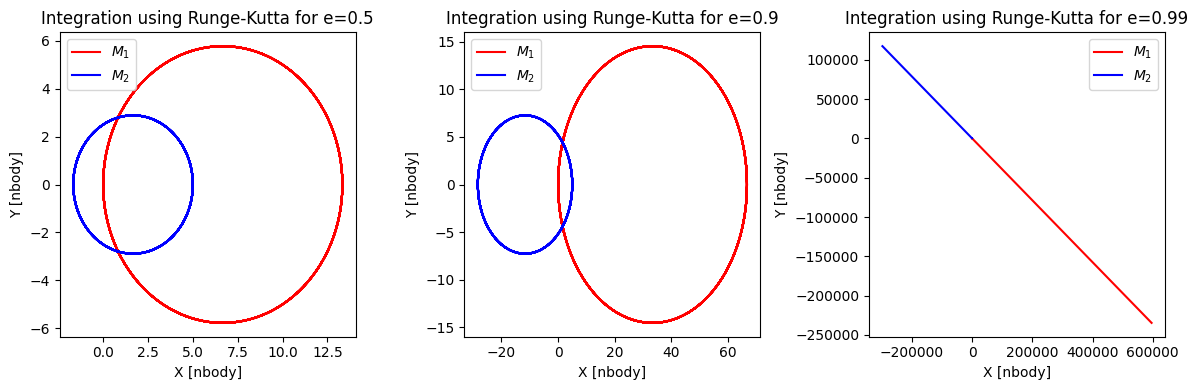

In [50]:
plt.figure(figsize=(12,4))

plt.suptitle('Integration using Runge-Kutta with different eccentricities')

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('e=0.5')
plt.plot(path1_rungekutta_1[:,0], path1_rungekutta_1[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_1[:,0], path2_rungekutta_1[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('e=0.9')
plt.plot(path1_rungekutta_2[:,0], path1_rungekutta_2[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_2[:,0], path2_rungekutta_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('e=0.99')
plt.plot(path1_rungekutta_3[:,0], path1_rungekutta_3[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_3[:,0], path2_rungekutta_3[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()
plt.show()

### Energy Errors

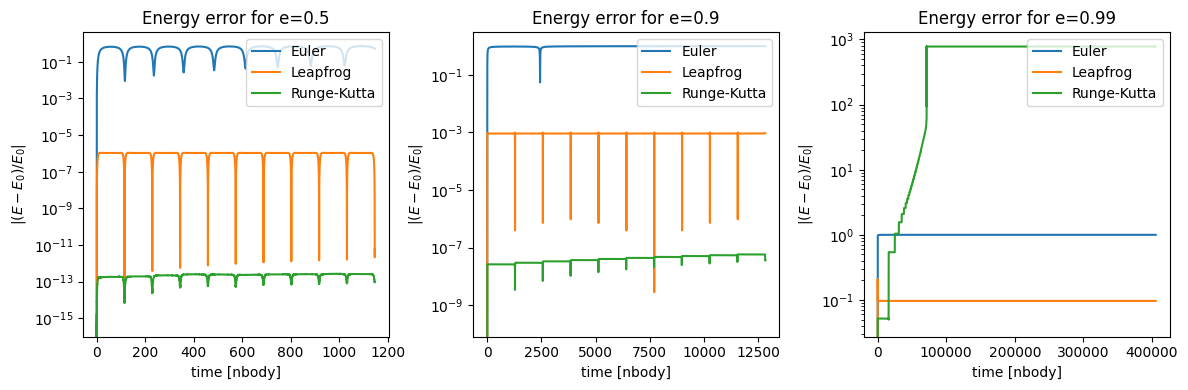

In [51]:
# TOTAL ENERGY ERROR EULER
energy_error_euler_1, time_euler_1 = total_energy_error(Etot_euler_1, t, tsimulation_1, h_1)
energy_error_euler_2, time_euler_2 = total_energy_error(Etot_euler_2, t, tsimulation_2, h_2)
energy_error_euler_3, time_euler_3 = total_energy_error(Etot_euler_3, t, tsimulation_3, h_3)

# TOTAL ENERGY ERROR LEAPFROG
energy_error_leapfrog_1, time_leapfrog_1 = total_energy_error(Etot_leapfrog_1, t, tsimulation_1, h_1)
energy_error_leapfrog_2, time_leapfrog_2 = total_energy_error(Etot_leapfrog_2, t, tsimulation_2, h_2)
energy_error_leapfrog_3, time_leapfrog_3 = total_energy_error(Etot_leapfrog_3, t, tsimulation_3, h_3)

# TOTAL ENERGY ERROR RUNGE-KUTTA
energy_error_rungekutta_1, time_rungekutta_1 = total_energy_error(Etot_rungekutta_1, t, tsimulation_1, h_1)
energy_error_rungekutta_2, time_rungekutta_2 = total_energy_error(Etot_rungekutta_2, t, tsimulation_2, h_2)
energy_error_rungekutta_3, time_rungekutta_3 = total_energy_error(Etot_rungekutta_3, t, tsimulation_3, h_3)

# TOTAL ENERGY ERROR ALL TOGETHER
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(time_euler_1, energy_error_euler_1, label='Euler')
plt.plot(time_leapfrog_1, energy_error_leapfrog_1, label='Leapfrog')
plt.plot(time_rungekutta_1, energy_error_rungekutta_1, label='Runge-Kutta')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.title('Energy error for e=0.5')
plt.legend(loc='upper right')

plt.subplot(1,3,2)
plt.plot(time_euler_2, energy_error_euler_2, label='Euler')
plt.plot(time_leapfrog_2, energy_error_leapfrog_2, label='Leapfrog')
plt.plot(time_rungekutta_2, energy_error_rungekutta_2, label='Runge-Kutta')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.title('Energy error for e=0.9')
plt.legend(loc='upper right')

plt.subplot(1,3,3)
plt.plot(time_euler_3, energy_error_euler_3, label='Euler')
plt.plot(time_leapfrog_3, energy_error_leapfrog_3, label='Leapfrog')
plt.plot(time_rungekutta_3, energy_error_rungekutta_3, label='Runge-Kutta')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.title('Energy error for e=0.99')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



### COMMENTS

This is totally coherent with the theoretical expectations. In fact, the Euler is a first order method, and it fails in accuracy for $e=0.9$ (for $e=99$ is simply unusable). Regarding the Leapfrog instead the method reproduces well the $e=0.5$ case and the $e=0.9$ case, but fails in accuracy when dealing with $e=0.99$. Finally, the Runge-Kutta method reproduces well all the three values of the eccentricity used in our analysis. 

Another thing we can put our attention on is the computational time spent to perform the integrations. Naturally, the Euler method is the one that takes the least amount of time (2 minutes for $n_{steps}=100000$), then follows the leapfrog (3 minutes and 40 seconds for $n_{steps}=100000$) and finally the Runge-Kutta (8 minutes and 50 seconds for $n_{steps}=100000$).